In [2]:
import sys
import sklearn
import yellowbrick
import seaborn as sns
import pandas as pd
import numpy as np

sys.version

'3.10.13 (main, Dec  4 2023, 17:59:54) [Clang 15.0.0 (clang-1500.0.40.1)]'

# 1 choisir les variables et apliquer le modele
sur le prochaine exo on veut clasifier les 3 types des voitures sur le dataset autos2005 a partir des variables actifs ligne 0 a 8

In [3]:
df = pd.read_excel('../autos2005.xlsx', sheet_name='actifs', index_col='Modele')
df.head()

,puissance,cylindree,vitesse,longueur,largeur,hauteur,poids,CO2,prix,origine,carburant,type4X4
Modele,,,,,,,,,,,,
SANTA_FE,125,1991,172,450,185,173,1757,197,27990,Autres,Diesel,oui
MURANO,234,3498,200,477,188,171,1870,295,44000,Autres,Essence,oui
LANDCRUI,204,4164,170,489,194,185,2495,292,67100,Autres,Diesel,oui
OUTLAND,202,1997,220,455,178,167,1595,237,29990,Autres,Diesel,oui
X-TRAIL,136,2184,180,446,177,168,1520,190,29700,Autres,Diesel,oui


In [5]:
print(f'Shape of DF: {df.shape} \n')
print(f'Info: {df.info()} \n')
print(f'Columns: {df.columns} \n')

Shape of DF: (34, 12) 

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, SANTA_FE to AUDIA8
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   puissance  34 non-null     int64 
 1   cylindree  34 non-null     int64 
 2   vitesse    34 non-null     int64 
 3   longueur   34 non-null     int64 
 4   largeur    34 non-null     int64 
 5   hauteur    34 non-null     int64 
 6   poids      34 non-null     int64 
 7   CO2        34 non-null     int64 
 8   prix       34 non-null     int64 
 9   origine    34 non-null     object
 10  carburant  34 non-null     object
 11  type4X4    34 non-null     object
dtypes: int64(9), object(3)
memory usage: 3.5+ KB
Info: None 

Columns: Index(['puissance', 'cylindree', 'vitesse', 'longueur', 'largeur', 'hauteur',
       'poids', 'CO2', 'prix', 'origine', 'carburant', 'type4X4'],
      dtype='object') 



### Statistiques descriptifs avec les vars actifs

In [8]:
var_actifs = df.iloc[:, 0:8]
var_actifs.describe()

,puissance,cylindree,vitesse,longueur,largeur,hauteur,poids,CO2
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,155.117647,2211.941176,200.058824,435.735294,177.529412,152.205882,1424.705882,192.882353
std,71.143374,989.897636,31.213770,45.710757,9.795594,11.841835,361.897485,56.688818
min,54.000000,998.000000,150.000000,344.000000,159.000000,134.000000,840.000000,113.000000
25%,100.500000,1595.750000,173.750000,393.750000,170.250000,144.000000,1208.000000,143.000000
50%,147.500000,1996.000000,200.000000,444.500000,177.000000,147.500000,1395.000000,188.500000
75%,208.500000,2479.250000,220.750000,473.250000,184.500000,158.750000,1595.000000,234.000000
max,340.000000,5654.000000,250.000000,506.000000,203.000000,185.000000,2495.000000,295.000000


### Vars correlations (Heatmap, and pairplot)

In [11]:
# Pair using pandas
var_actifs.corr()

,puissance,cylindree,vitesse,longueur,largeur,hauteur,poids,CO2
puissance,1.000000,0.842128,0.845940,0.788602,0.700769,0.076837,0.730888,0.900724
cylindree,0.842128,1.000000,0.580312,0.740198,0.721050,0.287585,0.788868,0.751129
vitesse,0.845940,0.580312,1.000000,0.733627,0.584930,-0.277544,0.455803,0.641541
longueur,0.788602,0.740198,0.733627,1.000000,0.872738,0.158869,0.821180,0.727378
largeur,0.700769,0.721050,0.584930,0.872738,1.000000,0.272809,0.822544,0.672806
hauteur,0.076837,0.287585,-0.277544,0.158869,0.272809,1.000000,0.576832,0.223755
poids,0.730888,0.788868,0.455803,0.821180,0.822544,0.576832,1.000000,0.743184
CO2,0.900724,0.751129,0.641541,0.727378,0.672806,0.223755,0.743184,1.000000


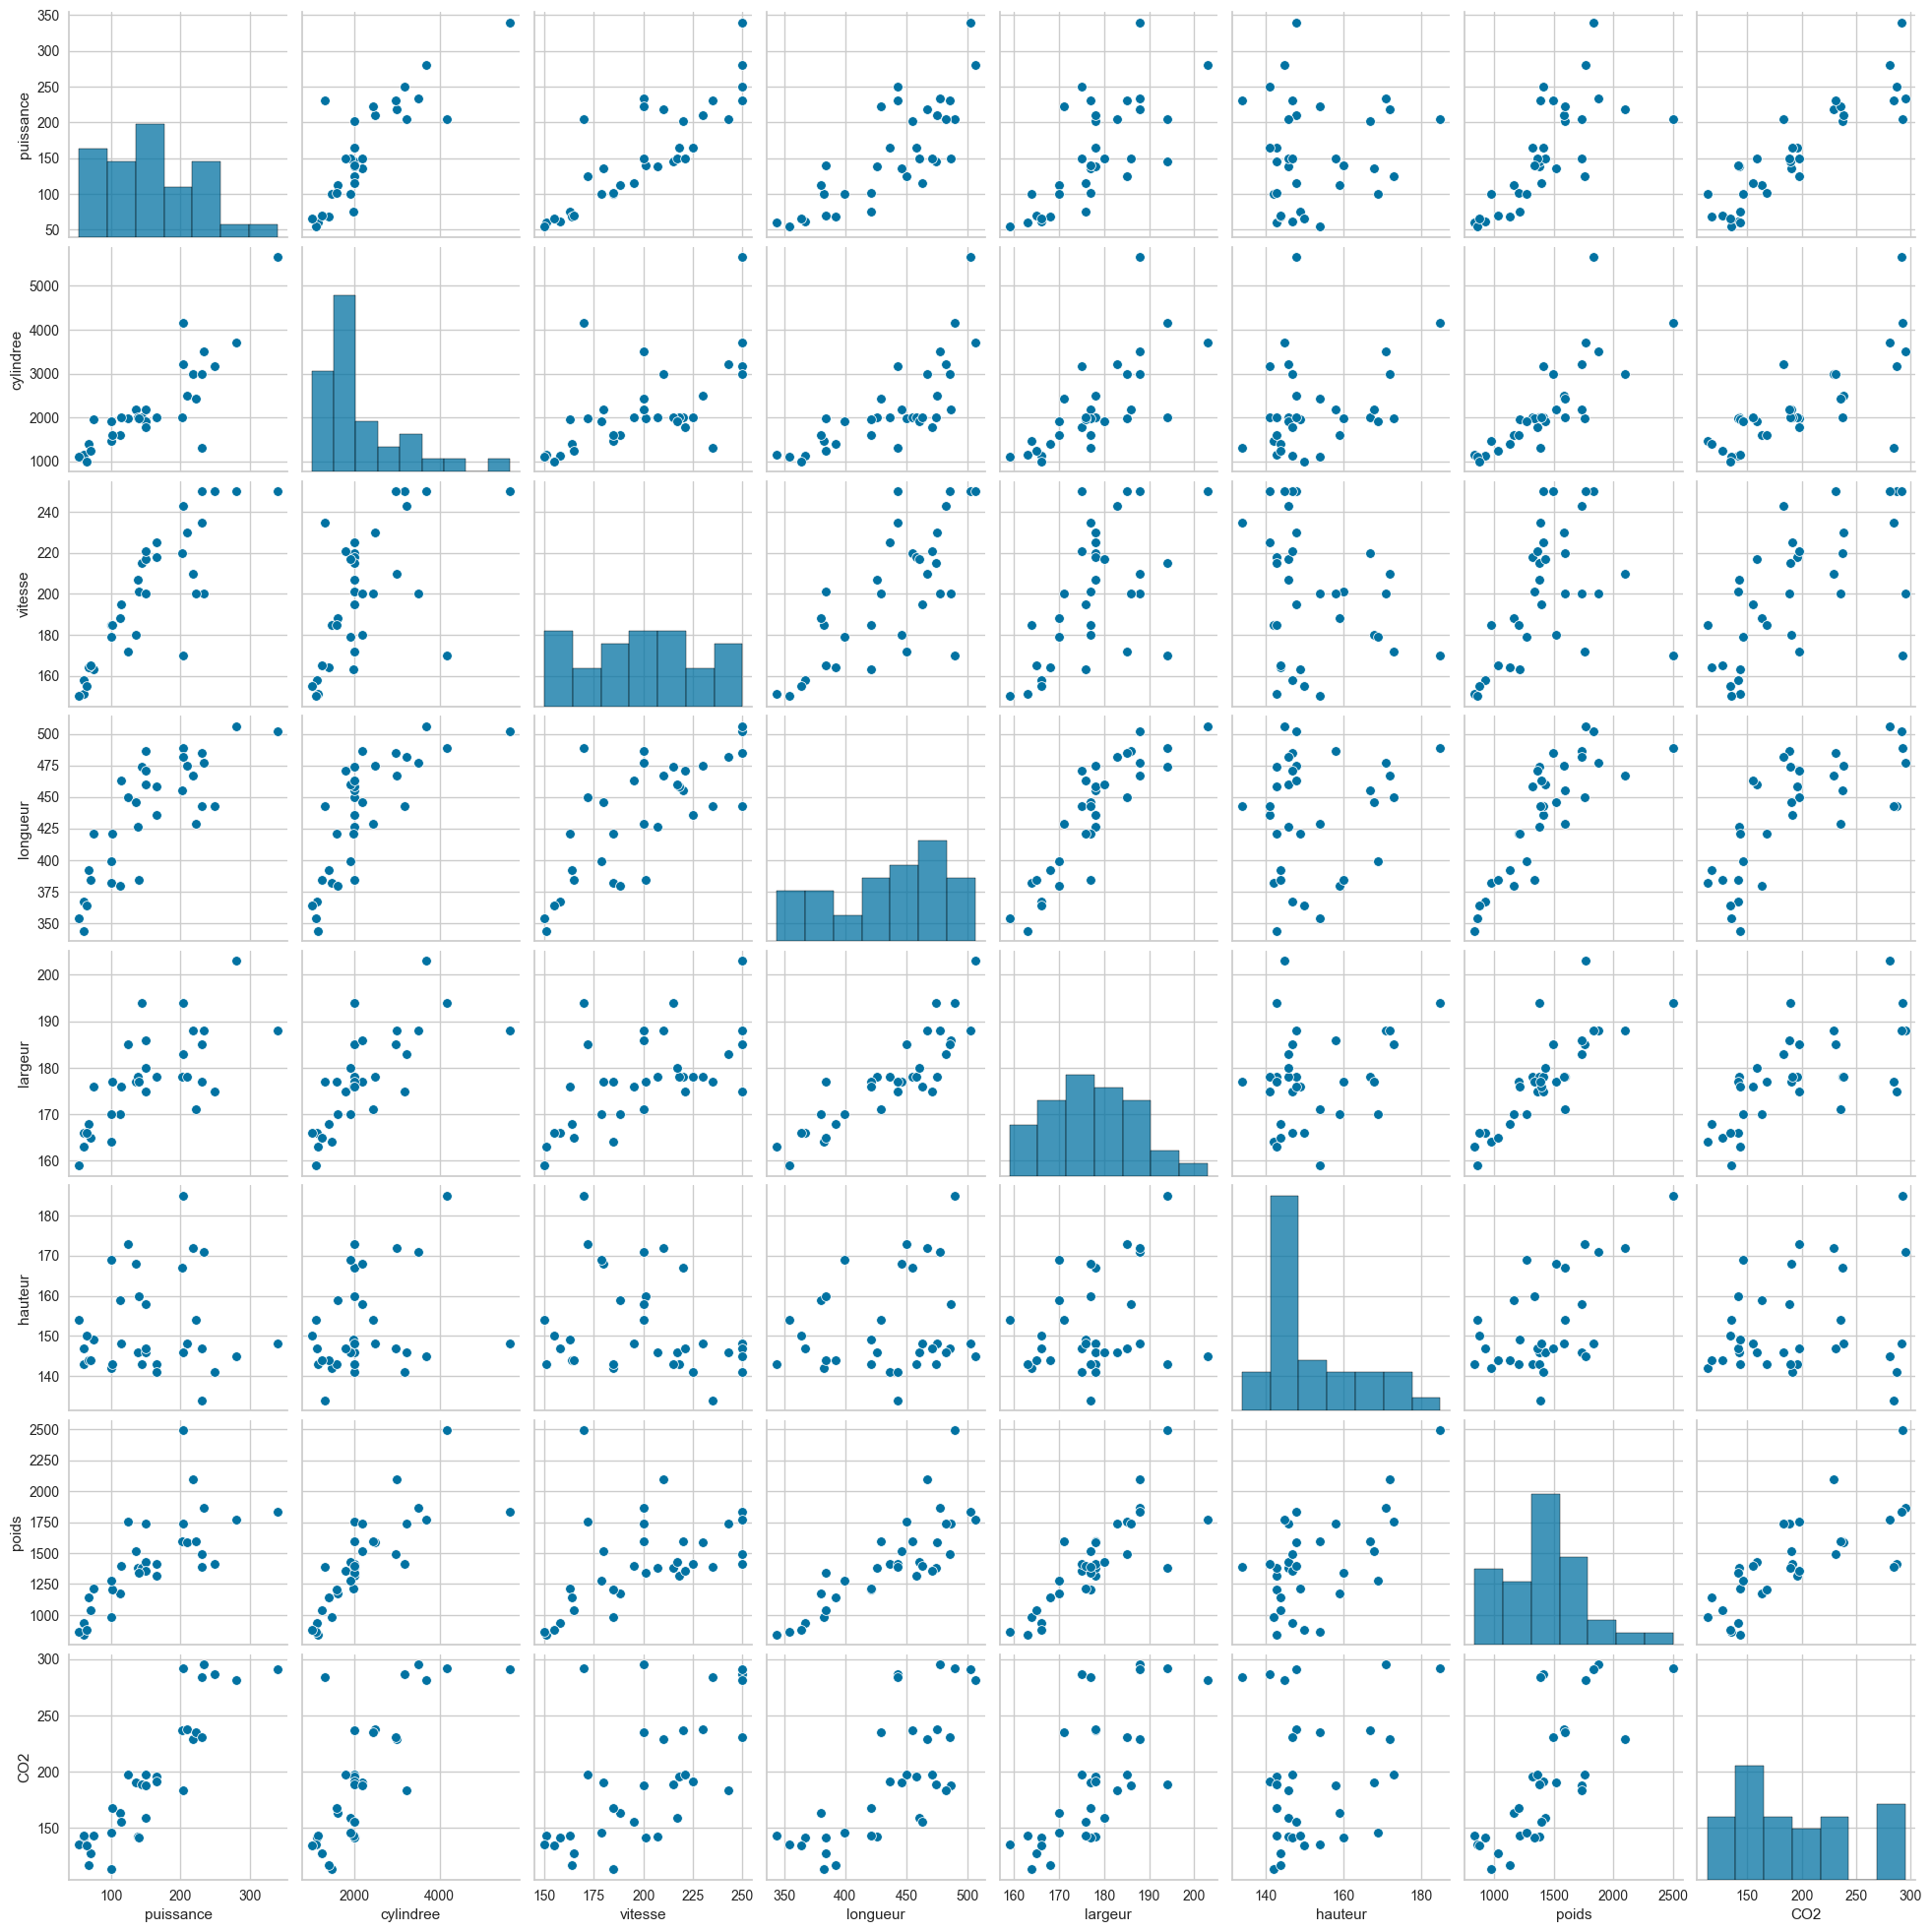

In [10]:
# Pair using seaborn
sns.pairplot(var_actifs)

<Axes: >

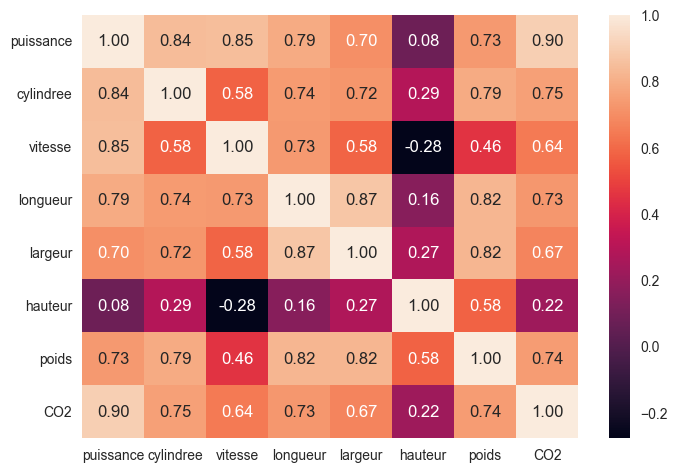

In [9]:
# Pair using seaborn with correlation
sns.heatmap(var_actifs.corr(), annot=True, fmt=".2f")

## K-means avec la librarie "scikit-learn"

In [10]:
from sklearn.preprocessing import StandardScaler

k=3
std = StandardScaler()

ZSA = std.fit_transform(var_actifs)
var_actifs_std = pd.DataFrame(ZSA, columns=var_actifs.columns, index=var_actifs.index)
var_actifs_std.describe()


,puissance,cylindree,vitesse,longueur,largeur,hauteur,poids,CO2
count,3.400000e+01,3.400000e+01,3.400000e+01,3.400000e+01,3.400000e+01,3.400000e+01,3.400000e+01,3.400000e+01
mean,-1.175530e-16,-7.183796e-17,-1.436759e-16,-3.004133e-16,-1.697988e-16,-9.763432e-16,-1.012262e-16,1.371452e-16
std,1.015038e+00,1.015038e+00,1.015038e+00,1.015038e+00,1.015038e+00,1.015038e+00,1.015038e+00,1.015038e+00
min,-1.442697e+00,-1.244772e+00,-1.627859e+00,-2.037045e+00,-1.920054e+00,-1.560541e+00,-1.639964e+00,-1.430329e+00
25%,-7.792575e-01,-6.318408e-01,-8.555348e-01,-9.323120e-01,-7.543068e-01,-7.033780e-01,-6.078097e-01,-8.931657e-01
50%,-1.086848e-01,-2.214255e-01,-1.912878e-03,1.946263e-01,-5.485868e-02,-4.033709e-01,-8.331810e-02,-7.846797e-02
75%,7.616330e-01,2.740978e-01,6.728549e-01,8.330396e-01,7.223059e-01,5.609376e-01,4.776355e-01,7.362297e-01
max,2.637810e+00,3.529478e+00,1.624034e+00,1.560276e+00,2.639312e+00,2.810991e+00,3.001927e+00,1.828462e+00


In [11]:
var_actifs_std.std()

puissance    1.015038
cylindree    1.015038
vitesse      1.015038
longueur     1.015038
largeur      1.015038
hauteur      1.015038
poids        1.015038
CO2          1.015038
dtype: float64

In [12]:
import numpy as np
np.std(var_actifs_std, ddof=0)

/Users/halcolo/.pyenv/versions/3.10.13/envs/clustering/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


puissance    1.0
cylindree    1.0
vitesse      1.0
longueur     1.0
largeur      1.0
hauteur      1.0
poids        1.0
CO2          1.0
dtype: float64

In [13]:
from sklearn import cluster

clus = cluster.KMeans(n_clusters=k, random_state=0, n_init=10)
clus.fit(var_actifs_std)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [14]:
clus.inertia_   

100.35809983976444

In [15]:
clus.labels_

array([1, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 0, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 0, 1, 1, 2, 1, 1, 1, 0], dtype=int32)

In [16]:
pd.DataFrame(clus.labels_, index=var_actifs.index, columns=['Cluster'])

,Cluster
Modele,
SANTA_FE,1
MURANO,0
LANDCRUI,0
OUTLAND,1
X-TRAIL,1
CITRONC5,1
LAGUNA,1
CITRONC4,1
CLIO,2


In [17]:
var_actifs_std['Kmeans'] = clus.labels_
cars_kmeans = var_actifs_std.groupby('Kmeans').mean()
cars_kmeans 


,puissance,cylindree,vitesse,longueur,largeur,hauteur,poids,CO2
Kmeans,,,,,,,,
0,1.427925,1.834701,0.518390,1.165014,1.520195,1.028092,1.650028,1.516907
1,0.296261,0.002895,0.529867,0.489178,0.219435,-0.189080,0.211677,0.231718
2,-1.014671,-0.768560,-0.966641,-1.178425,-0.944280,-0.160508,-0.987388,-0.960311


In [18]:
effectif = np.unique(clus.labels_, return_counts=True)
effectif = list(effectif[1])
print("number of elements by cluster = " ,effectif)


number of elements by cluster =  [5, 17, 12]


In [19]:
proto = pd.DataFrame(clus.cluster_centers_, columns=var_actifs.columns)
proto.head()

,puissance,cylindree,vitesse,longueur,largeur,hauteur,poids,CO2
0,1.427925,1.834701,0.518390,1.165014,1.520195,1.028092,1.650028,1.516907
1,0.296261,0.002895,0.529867,0.489178,0.219435,-0.189080,0.211677,0.231718
2,-1.014671,-0.768560,-0.966641,-1.178425,-0.944280,-0.160508,-0.987388,-0.960311


In [20]:
# Number of effectifs by cluster
BSSk = effectif * np.sum((clus.cluster_centers_**2), axis=1)
BSSk

array([77.11326198, 13.43401958, 81.0946186 ])

In [21]:
BSS = np.sum(BSSk)
BSS

171.6419001602356

In [22]:
# 18. Inertia
WSS = clus.inertia_
WSS

100.35809983976444

In [23]:
TSS = ZSA.shape[0] * ZSA.shape[1]
TSS

272

In [24]:
TSS_direct = np.sum(var_actifs_std.shape[0] * np.var(var_actifs_std, ddof=0))
TSS_direct

/Users/halcolo/.pyenv/versions/3.10.13/envs/clustering/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


287.55882352941177

In [25]:
R_square = BSS / TSS
print("Proportion d'inertie expliqué", R_square * 100)

Proportion d'inertie expliqué 63.1036397647925


### Détermination du nombre de classes

In [26]:
#rendre silencieux les warnings à partir d'ici
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings(action='ignore')
 

#courbe pour identifier le nombre de groupes - de 1 à 10
kWSS = np.zeros(11)
#nombre de clusters = 1 => WSS = TSS
kWSS[1] = TSS
#boucler
for k in range(2,11):
    km = KMeans(n_clusters=k,n_init=10)
    km.fit(ZSA)
    kWSS[k] = km.inertia_

#affichage de contrôle
kWSS

array([  0.        , 272.        , 145.68354662, 100.35809984,
        80.95736691,  64.42567191,  52.51870206,  43.22053192,
        38.11677665,  34.80442706,  29.34418086])

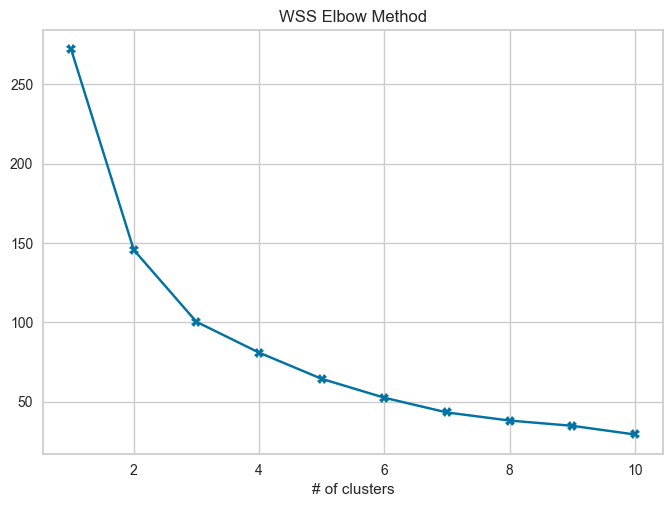

In [27]:
import matplotlib.pyplot as plt

plt.title("WSS Elbow Method")
plt.xlabel("# of clusters")
plt.plot(np.arange(1,11),kWSS[1:11], marker = "X")
plt.show()

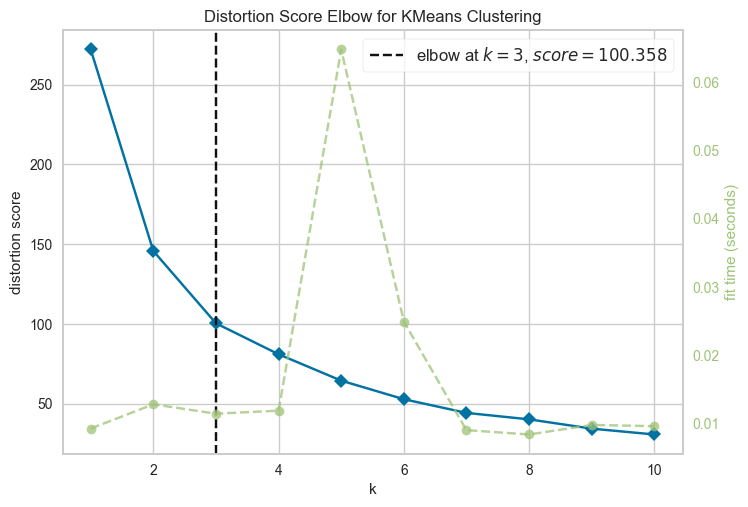

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
#et si on utilise yellowbrick maintenant ?
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(KMeans(n_init=10),k=(1,11),metric='distortion')
visualizer.fit(ZSA)
visualizer.show()

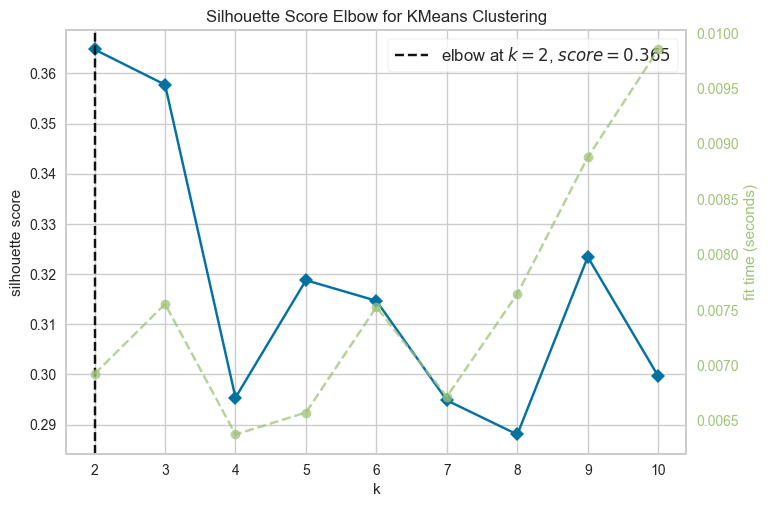

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [29]:
#et avec de critère de Calinski-Harabasz
visualizer = KElbowVisualizer(KMeans(n_init=10),k=(2,11),metric='silhouette')
visualizer.fit(ZSA)
visualizer.show()

# Interprétation - Variables actives


In [30]:
#identifier les variables qui impactent le plus la séparabilité
#calcul des carrés des rapports de corrélation

#SCT = n * la variance
# etpuisque les vaiables sont centrées et réduites
SCT = ZSA.shape[0]

#SCE de chaque variable, sachant qu'elles sont centrées
SCE = np.dot(effectif,clus.cluster_centers_**2)

#carré du rapport de corrélation
eta2 = SCE / SCT

#transformer en series pour une présentation plus avenante
eta2S = pd.Series(eta2)
eta2S.index = var_actifs.columns
print(eta2S.sort_values(ascending=False))

longueur     0.809369
poids        0.766880
puissance    0.707107
cylindree    0.703500
CO2          0.690711
largeur      0.678633
vitesse      0.509685
hauteur      0.182405
dtype: float64


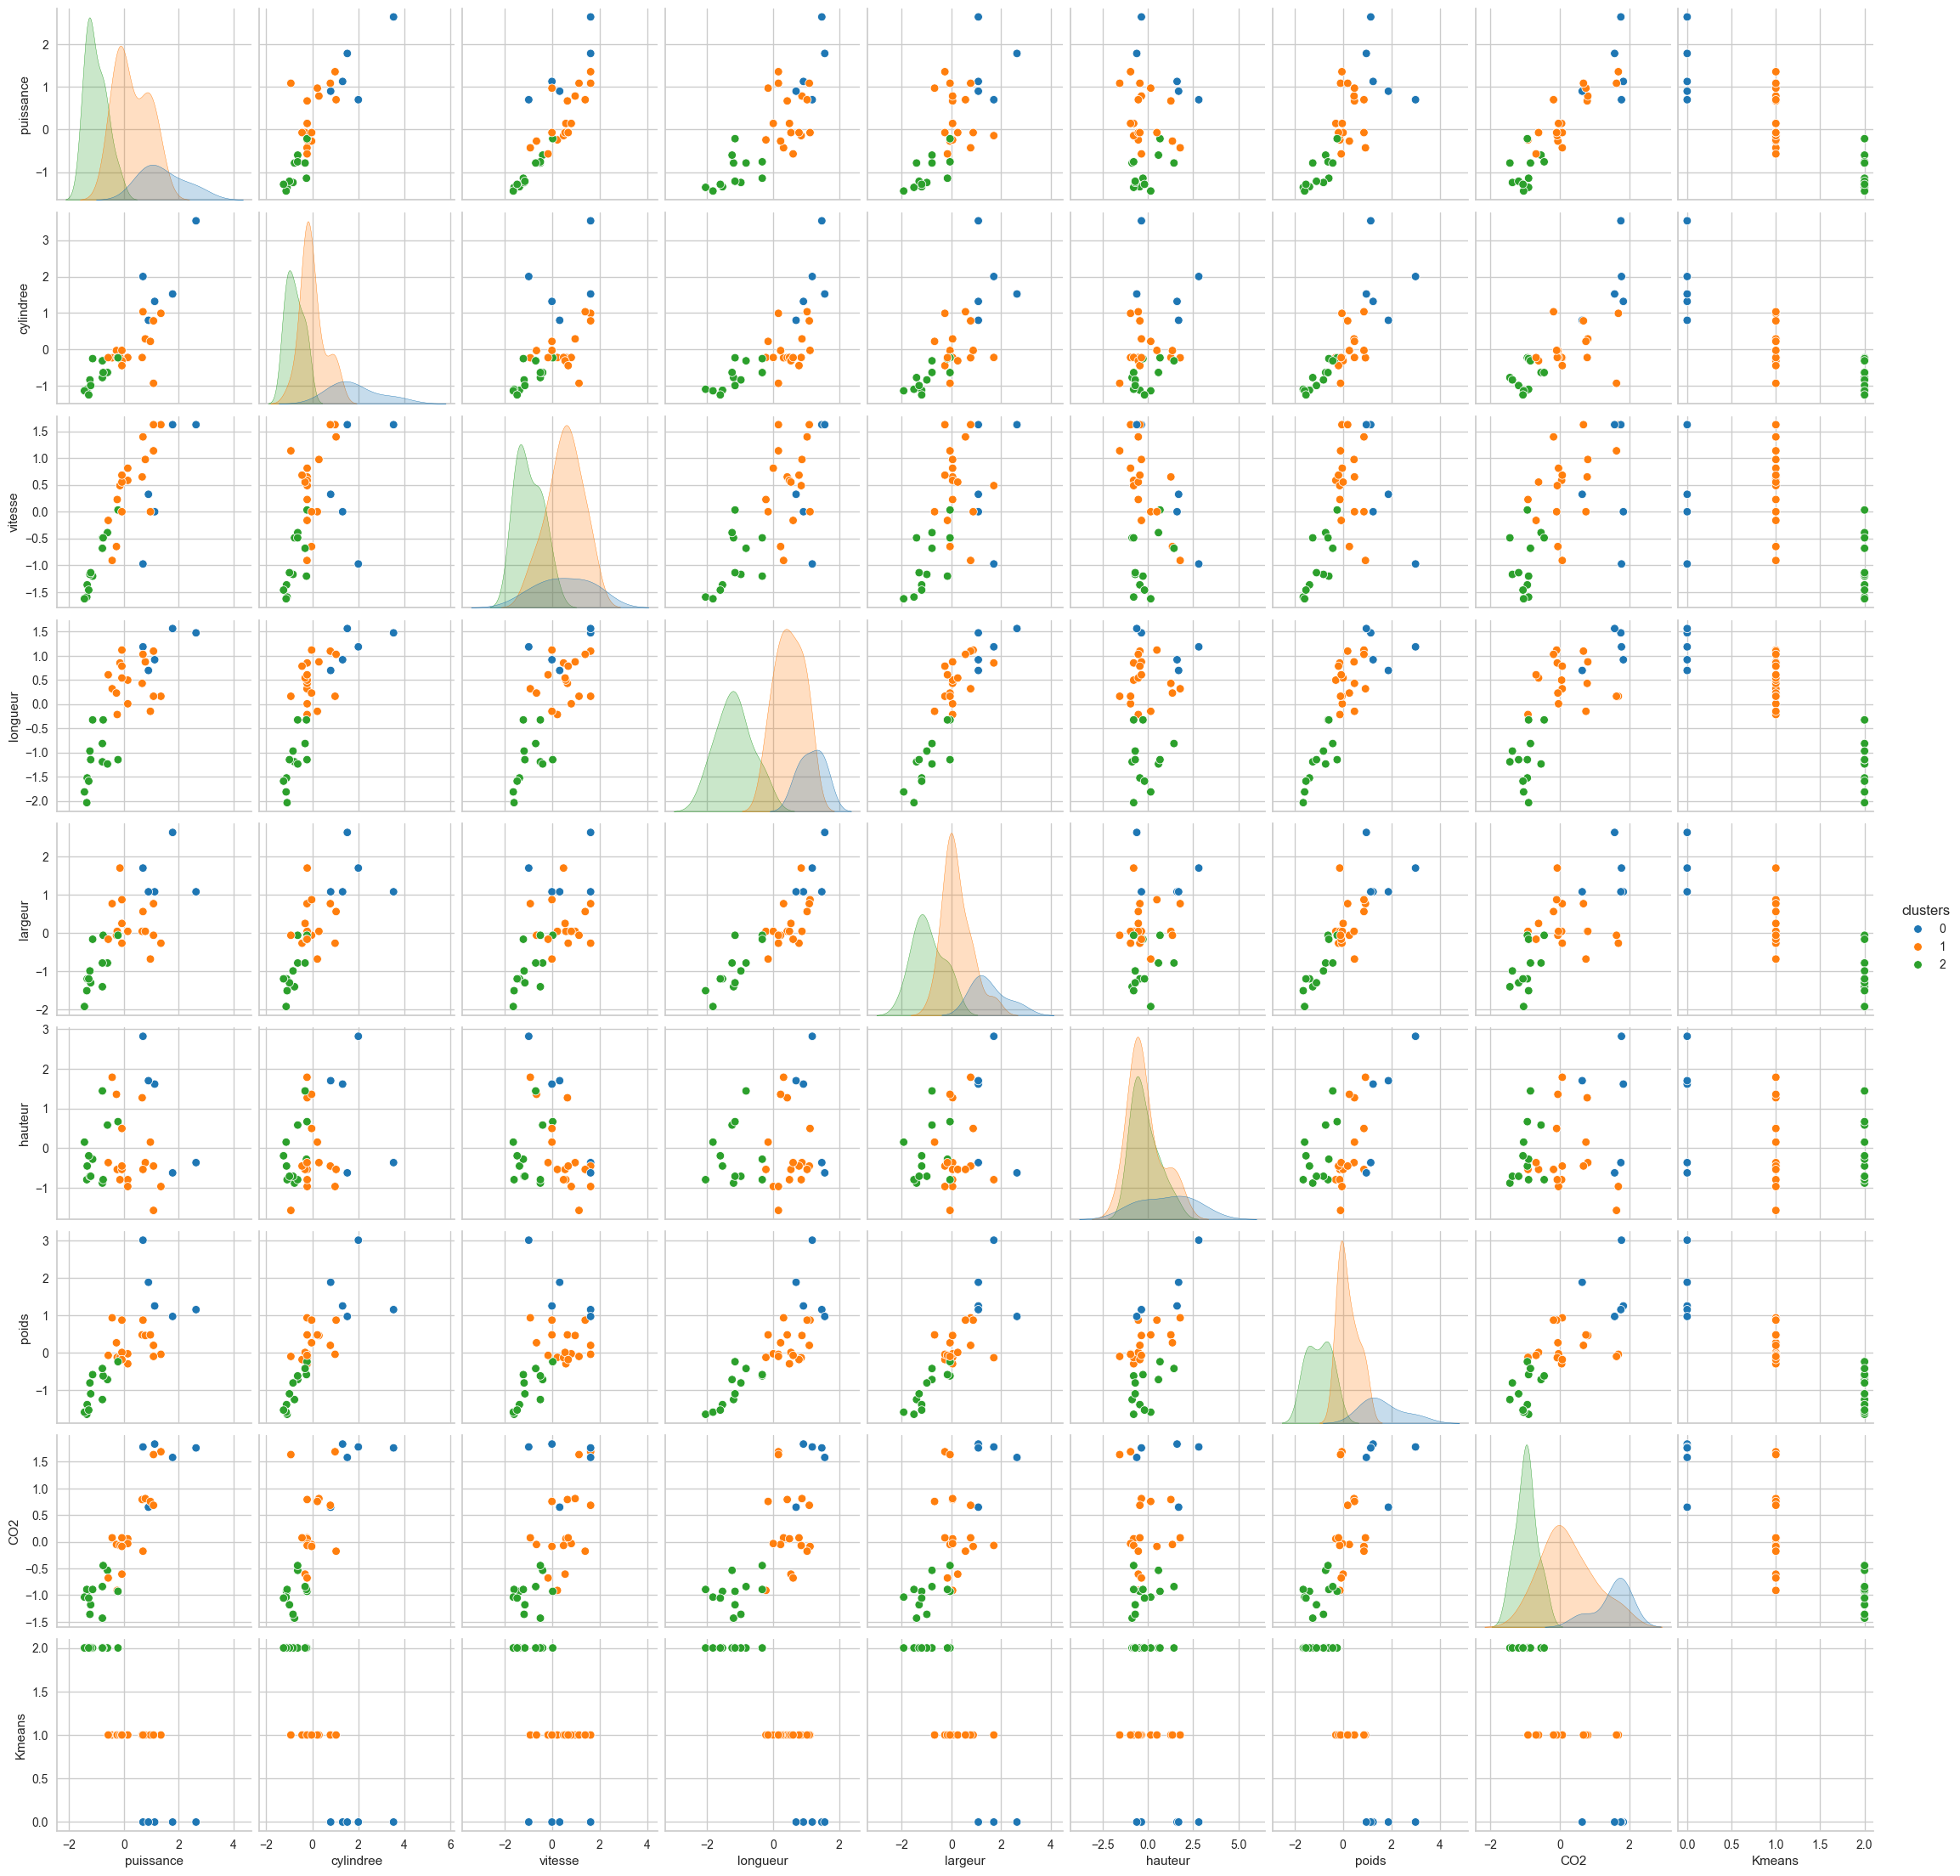

In [31]:
#df temporaire avec la colonne supp.
dfTemp = var_actifs_std.copy()
dfTemp['clusters'] = clus.labels_

#graphique - couple de variables et groupes
sns.pairplot(dfTemp,hue='clusters',palette='tab10')

In [32]:
gb = var_actifs_std.groupby(clus.labels_)
gb.size()

0     5
1    17
2    12
dtype: int64

In [33]:
gb.mean()

,puissance,cylindree,vitesse,longueur,largeur,hauteur,poids,CO2,Kmeans
0,1.427925,1.834701,0.518390,1.165014,1.520195,1.028092,1.650028,1.516907,0.0
1,0.296261,0.002895,0.529867,0.489178,0.219435,-0.189080,0.211677,0.231718,1.0
2,-1.014671,-0.768560,-0.966641,-1.178425,-0.944280,-0.160508,-0.987388,-0.960311,2.0


# Interpretation avec variables suplementaires

In [34]:
#data frame avec les variables supplémentaires et l'appartenance aux groupes
XSupp = df[['prix','origine','carburant','type4X4']]
XSupp['clusters'] = clus.labels_
XSupp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, SANTA_FE to AUDIA8
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   prix       34 non-null     int64 
 1   origine    34 non-null     object
 2   carburant  34 non-null     object
 3   type4X4    34 non-null     object
 4   clusters   34 non-null     int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 2.5+ KB


In [35]:
pd.pivot_table(XSupp,index='clusters',values='prix',aggfunc='mean')


,prix
clusters,
0,59268.000000
1,31430.588235
2,15306.666667


In [37]:
#data frame avec les variables supplémentaires et l'appartenance aux groupes
XSupp = df[['prix','origine','carburant','type4X4']]
XSupp['clusters'] = clus.labels_
XSupp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, SANTA_FE to AUDIA8
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   prix       34 non-null     int64 
 1   origine    34 non-null     object
 2   carburant  34 non-null     object
 3   type4X4    34 non-null     object
 4   clusters   34 non-null     int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 2.5+ KB


In [38]:
#calculer le prix moyen des véhicules de chaque groupe
pd.pivot_table(XSupp,index='clusters',values='prix',aggfunc='mean')

,prix
clusters,
0,59268.000000
1,31430.588235
2,15306.666667


In [39]:
#pour le calcul du KHI-2 du tableau de contingence
from scipy.stats import chi2_contingency

# Calculer les V de Cramer de chaque variable supplémentaire
for i in ['origine', 'carburant', 'type4X4']:
    crosstab = np.array(pd.crosstab(XSupp.clusters, XSupp[i], rownames=None, colnames=None))
    stat = chi2_contingency(crosstab)[0]
    obs = np.sum(crosstab)
    mini = min(crosstab.shape) - 1
    v = np.sqrt(stat / (obs * mini))
    print("V de Cramer de {} = {}".format(i, v))


V de Cramer de origine = 0.2986443589941745
V de Cramer de carburant = 0.06454972243679027
V de Cramer de type4X4 = 0.3732430104202706


In [42]:
pd.crosstab(XSupp.clusters, XSupp.type4X4, rownames=None, colnames=None)

type4X4,non,oui
clusters,,
0,3,2
1,14,3
2,12,0


In [43]:
pd.crosstab(XSupp.clusters, XSupp.origine, rownames=None, colnames=None)

origine,Autres,Europe,France
clusters,,,
0,3,2,0
1,6,6,5
2,1,7,4


# Individus suplementaires

In [47]:
df_ilust = pd.read_excel('../autos2005.xlsx', sheet_name='illustratifs', index_col='Modele')
df_ilust.head()


,puissance,cylindree,vitesse,longueur,largeur,hauteur,poids,CO2,prix,origine,carburant,type4X4
Modele,,,,,,,,,,,,
P407,136,1997,212,468,182,145,1415,194,23400,France,Essence,non
P307CC,180,1997,225,435,176,143,1490,210,28850,France,Essence,non
P1007,75,1360,165,374,169,161,1181,153,13600,France,Essence,non
P607,204,2721,230,491,184,145,1723,223,40550,France,Diesel,non


In [50]:
var_actives = df.columns[:8]
df_ilust[var_actives]

,puissance,cylindree,vitesse,longueur,largeur,hauteur,poids,CO2
Modele,,,,,,,,
P407,136,1997,212,468,182,145,1415,194
P307CC,180,1997,225,435,176,143,1490,210
P1007,75,1360,165,374,169,161,1181,153
P607,204,2721,230,491,184,145,1723,223


In [53]:
ZindSupp = pd.DataFrame(std.transform(df_ilust[var_actives]), columns=var_actives, index=df_ilust.index)
ZindSupp

,puissance,cylindree,vitesse,longueur,largeur,hauteur,poids,CO2
Modele,,,,,,,,
P407,-0.272761,-0.220400,0.388314,0.716460,0.463251,-0.617662,-0.027223,0.020012
P307CC,0.355009,-0.220400,0.811060,-0.016328,-0.158481,-0.789094,0.183135,0.306499
P1007,-1.143079,-0.873578,-1.140075,-1.370874,-0.883834,0.753799,-0.683538,-0.714111
P607,0.697429,0.521988,0.973655,1.227190,0.670495,-0.617662,0.836646,0.539270


In [54]:
clusIndSupp = clus.predict(ZindSupp)
pd.Series(clusIndSupp,index=ZindSupp.index)

Modele
P407      1
P307CC    1
P1007     2
P607      1
dtype: int32

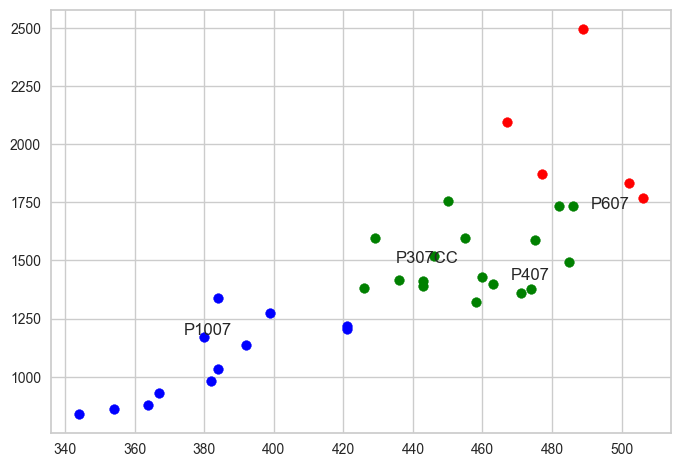

In [63]:
#graphique dans le plan (longueur,poids)
for k,couleur in zip(np.unique(clus.labels_),['red','green','blue']):
    plt.scatter(var_actifs.loc[clus.labels_==k,'longueur'],var_actifs.loc[clus.labels_==k,'poids'],c=couleur)
#rajouter les individus supplémentaires
for i,label in enumerate(df_ilust.index):
    plt.annotate(label,(df_ilust.longueur.values[i],df_ilust.poids.values[i]))
plt.show()